In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# データ入力
(x_train, _), (x_test, _) = cifar10.load_data() # tf: (32, 32, 3)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

In [2]:
# ヒストリーを表示メソッド
def plot_history(history):
    print('min loss: ', np.min(history['loss']), ' min val_loss:', np.min(history['val_loss']))
    xlin = range(1, len(history['loss'])+1)
    plt.plot(xlin, history['loss'], label='loss')
    plt.plot(xlin, history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

In [3]:
# 入力画像と予測画像を表示するメソッド
def plot_images(X, model, reshape=True):
    # テスト画像を変換
    decoded_imgs = model.predict(X)

    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        if reshape:
            plt.imshow(X[i].reshape(32, 32, 3))
        else:
            plt.imshow(X[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        if reshape:
            plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
        else:
            plt.imshow(decoded_imgs[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## Undercomplete Autoencoderの実装

1層しかないシンプルなNN。

In [5]:
# モデル定義
input_dim = 32*32*3
encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder1 = Model(input=input_img, output=decoded)
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy')


# トレーニング
hist1 = autoencoder1.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s - loss: 0.6930 - val_loss: 0.6926
Epoch 2/100
50000/50000 [==============================] - 2252s - loss: 0.6908 - val_loss: 0.6875
Epoch 3/100
50000/50000 [==============================] - 21s - loss: 0.6828 - val_loss: 0.6789
Epoch 4/100
50000/50000 [==============================] - 21s - loss: 0.6770 - val_loss: 0.6748
Epoch 5/100
50000/50000 [==============================] - 21s - loss: 0.6718 - val_loss: 0.6676
Epoch 6/100
50000/50000 [==============================] - 20s - loss: 0.6628 - val_loss: 0.6581
Epoch 7/100
50000/50000 [==============================] - 20s - loss: 0.6555 - val_loss: 0.6532
Epoch 8/100
50000/50000 [==============================] - 20s - loss: 0.6519 - val_loss: 0.6505
Epoch 9/100
50000/50000 [==============================] - 20s - loss: 0.6492 - val_loss: 0.6478
Epoch 10/100
50000/50000 [==============================] - 21s - loss: 0.6

min loss:  0.594838444118  min val_loss: 0.590861841774


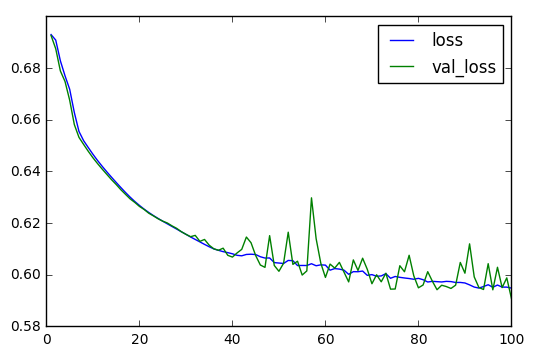

In [6]:
plot_history(hist1.history)

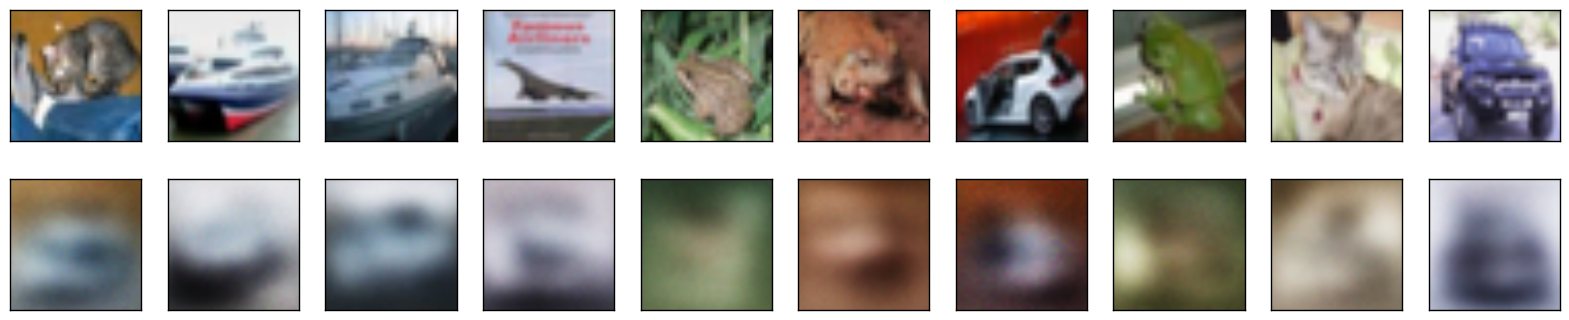

In [7]:
plot_images(x_test, autoencoder1)

In [8]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test)

print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 7.06469


## Deep Autoencoder

中間層の数を増やして深くすることを考える。

In [9]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder2 = Model(input=input_img, output=decoded)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')
hist2 = autoencoder2.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 28s - loss: 0.6448 - val_loss: 0.6217
Epoch 2/100
50000/50000 [==============================] - 28s - loss: 0.6114 - val_loss: 0.6076
Epoch 3/100
50000/50000 [==============================] - 29s - loss: 0.6049 - val_loss: 0.6034
Epoch 4/100
50000/50000 [==============================] - 28s - loss: 0.6015 - val_loss: 0.6019
Epoch 5/100
50000/50000 [==============================] - 28s - loss: 0.6006 - val_loss: 0.6015
Epoch 6/100
50000/50000 [==============================] - 28s - loss: 0.5989 - val_loss: 0.5980
Epoch 7/100
50000/50000 [==============================] - 28s - loss: 0.5966 - val_loss: 0.5968
Epoch 8/100
50000/50000 [==============================] - 28s - loss: 0.5956 - val_loss: 0.5960
Epoch 9/100
50000/50000 [==============================] - 28s - loss: 0.5947 - val_loss: 0.5952
Epoch 10/100
50000/50000 [==============================] - 28s - loss: 0.594

min loss:  0.585092534485  min val_loss: 0.586125347519


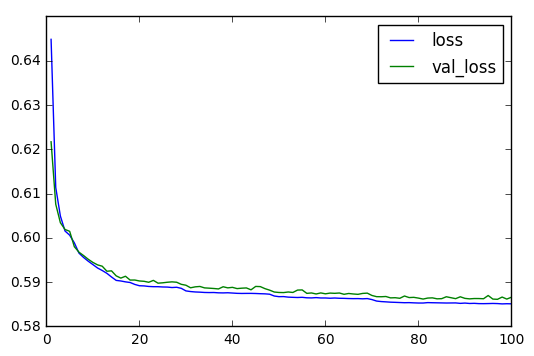

In [10]:
plot_history(hist2.history)

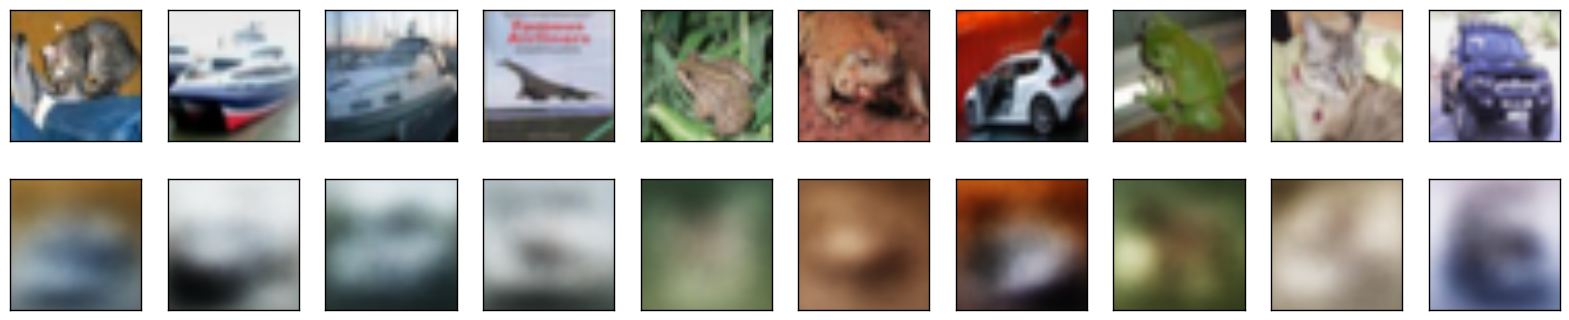

In [11]:
plot_images(x_test, autoencoder2)

In [12]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test)

print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 3.10773


## Stacked Convolutional Autoencoder

CNNを使うことを考える。

In [4]:
# データ入力
(x_train2d, y_train2d), (x_test2d, y_test2d) = cifar10.load_data() # tf: (32, 32, 3)
x_train2d = x_train2d.astype('float32') / 255.
x_test2d = x_test2d.astype('float32') / 255.
x_train2d.shape, x_test2d.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Layer1

In [5]:
input_img = Input(shape=(32, 32, 3))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='conv1')(input_img)
encoded = MaxPooling2D((2, 2), border_mode='same', name='pool1')(x)
# x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
# x = MaxPooling2D((2, 2), border_mode='same')(x)
# x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
# encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
# x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='deconv1')(encoded)
x = UpSampling2D((2, 2), name='up1')(x)
decoded = Convolution2D(3, 3, 3, activation='sigmoid', border_mode='same', name='decode')(x)

autoencoder3 = Model(input_img, decoded)
autoencoder3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 32, 32, 16)    448         input_1[0][0]                    
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 16, 16, 16)    0           conv1[0][0]                      
____________________________________________________________________________________________________
deconv1 (Convolution2D)          (None, 16, 16, 16)    2320        pool1[0][0]                      
___________________________________________________________________________________________

In [6]:
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy')
checkpoint = ModelCheckpoint('weights_layer1.h5', monitor='val_loss',  save_best_only=True, save_weights_only=True, mode='auto')

# 学習
hist = autoencoder3.fit(x_train2d, x_train2d,
                       nb_epoch=100,
                       batch_size=128,
                       shuffle=True,
                       validation_data=(x_test2d, x_test2d),
                       callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 150s - loss: 0.5788 - val_loss: 0.5623
Epoch 2/100
50000/50000 [==============================] - 133s - loss: 0.5588 - val_loss: 0.5581
Epoch 3/100
50000/50000 [==============================] - 133s - loss: 0.5563 - val_loss: 0.5564
Epoch 4/100
50000/50000 [==============================] - 133s - loss: 0.5552 - val_loss: 0.5557
Epoch 5/100
50000/50000 [==============================] - 133s - loss: 0.5545 - val_loss: 0.5550
Epoch 6/100
50000/50000 [==============================] - 133s - loss: 0.5540 - val_loss: 0.5547
Epoch 7/100
50000/50000 [==============================] - 133s - loss: 0.5537 - val_loss: 0.5544
Epoch 8/100
50000/50000 [==============================] - 133s - loss: 0.5535 - val_loss: 0.5542
Epoch 9/100
50000/50000 [==============================] - 133s - loss: 0.5533 - val_loss: 0.5541
Epoch 10/100
50000/50000 [==============================] - 134s - l

min loss:  0.551432591228  min val_loss: 0.552273647881


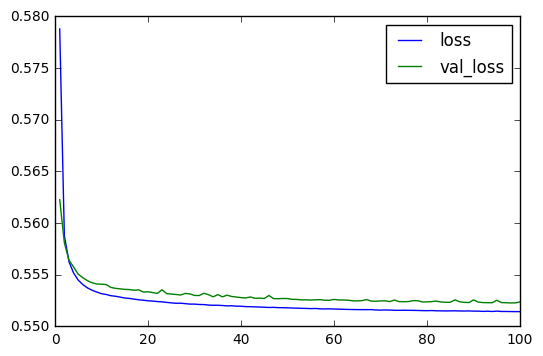

In [8]:
plot_history(hist.history)

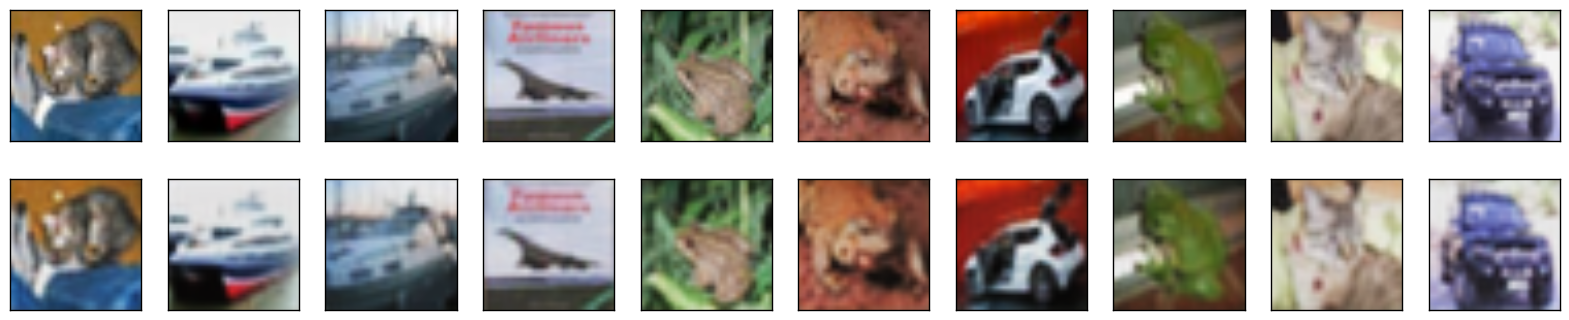

In [9]:
plot_images(x_test2d, autoencoder3, reshape=False)

In [10]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test2d)
print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 0.395421


### Layer2

In [11]:
input_img = Input(shape=(32, 32, 3))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='conv1')(input_img)
x = MaxPooling2D((2, 2), border_mode='same', name='pool1')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='conv2')(x)
encoded = MaxPooling2D((2, 2), border_mode='same', name='pool2')(x)
# x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
# encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
# x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='deconv2')(encoded)
x = UpSampling2D((2, 2), name='up2')(x)
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='deconv1')(x)
x = UpSampling2D((2, 2), name='up1')(x)
decoded = Convolution2D(3, 3, 3, activation='sigmoid', border_mode='same', name='decode')(x)

autoencoder3 = Model(input_img, decoded)
autoencoder3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 32, 32, 16)    448         input_2[0][0]                    
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 16, 16, 16)    0           conv1[0][0]                      
____________________________________________________________________________________________________
conv2 (Convolution2D)            (None, 16, 16, 8)     1160        pool1[0][0]                      
___________________________________________________________________________________________

In [12]:
def set_weights(model, h5_path, layer_names):
    print('before bias:', model.layers[1].get_weights()[1])
    # 重みをロード
    import h5py
    f = h5py.File(h5_path, mode='r')
    if 'layer_names' not in f.attrs and 'model_weights' in f:
        f = f['model_weights']
    # srcモデルのレイヤー名を取得
    #layer_names = [n.decode('utf8') for n in f.attrs['layer_names']]
    # destモデルのレイヤー取得
    flattened_layers = model.layers
    # Reverse index of layer name to list of layers with name.
    index = {}
    for layer in flattened_layers:
        if layer.name in layer_names:
            index.setdefault(layer.name, []).append(layer)

    # We batch weight value assignments in a single backend call
    # which provides a speedup in TensorFlow.
    weight_value_tuples = []
    for k, name in enumerate(layer_names):
        g = f[name]
        weight_names = [n.decode('utf8') for n in g.attrs['weight_names']]
        weight_values = [g[weight_name] for weight_name in weight_names]
        for layer in index.get(name, []):
            symbolic_weights = layer.weights
            if len(weight_values) != len(symbolic_weights):
                raise ValueError('Layer #' + str(k) +
                                 ' (named "' + layer.name +
                                 '") expects ' +
                                 str(len(symbolic_weights)) +
                                 ' weight(s), but the saved weights' +
                                 ' have ' + str(len(weight_values)) +
                                 ' element(s).')
        # Set values.
        for i in range(len(weight_values)):
            weight_value_tuples.append((symbolic_weights[i], weight_values[i]))

    K.batch_set_value(weight_value_tuples)
    f.close()
    print('after bias:', model.layers[1].get_weights()[1])


In [13]:
set_weights(autoencoder3, 'weights_layer1.h5', ['conv1', 'decode'])

before bias: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
after bias: [ 0.63852513 -0.05720734  0.33478013  0.18053062  0.11031239  0.16087238
  0.33903649  0.32489383  0.57352668  0.06503335  0.22533119  0.36826697
  0.53805023  0.44766584  0.45450956  0.03665533]


In [14]:
# 学習済みのノードをFreeze
autoencoder3.layers[1].trainable = False # conv1
autoencoder3.layers[-1].trainable = False # decode

In [15]:
checkpoint = ModelCheckpoint('weights_layer2.h5', monitor='val_loss',  save_best_only=True, save_weights_only=True, mode='auto')
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy')

# 学習
hist = autoencoder3.fit(x_train2d, x_train2d,
                       nb_epoch=100,
                       batch_size=128,
                       shuffle=True,
                       validation_data=(x_test2d, x_test2d),
                       callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 124s - loss: 0.5899 - val_loss: 0.5746
Epoch 2/100
50000/50000 [==============================] - 123s - loss: 0.5705 - val_loss: 0.5693
Epoch 3/100
50000/50000 [==============================] - 123s - loss: 0.5676 - val_loss: 0.5677
Epoch 4/100
50000/50000 [==============================] - 123s - loss: 0.5661 - val_loss: 0.5663
Epoch 5/100
50000/50000 [==============================] - 125s - loss: 0.5650 - val_loss: 0.5655
Epoch 6/100
50000/50000 [==============================] - 123s - loss: 0.5643 - val_loss: 0.5648
Epoch 7/100
50000/50000 [==============================] - 123s - loss: 0.5638 - val_loss: 0.5644
Epoch 8/100
50000/50000 [==============================] - 124s - loss: 0.5635 - val_loss: 0.5641
Epoch 9/100
50000/50000 [==============================] - 123s - loss: 0.5632 - val_loss: 0.5638
Epoch 10/100
50000/50000 [==============================] - 124s - l

min loss:  0.560022828064  min val_loss: 0.560844381905


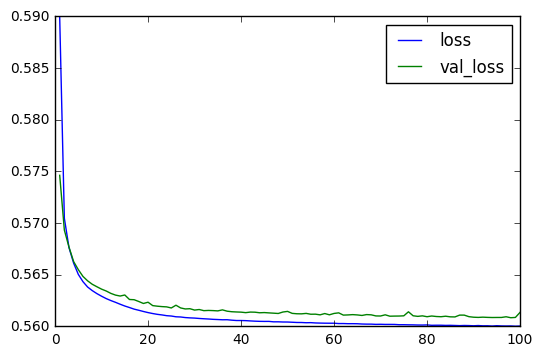

In [16]:
plot_history(hist.history)

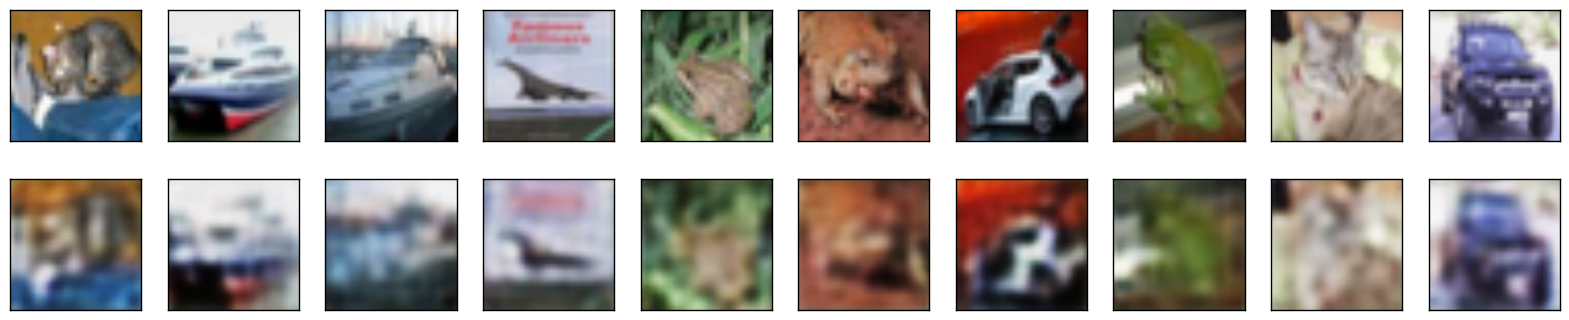

In [17]:
plot_images(x_test2d, autoencoder3, reshape=False)

In [18]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test2d)
print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 0.766014


### Layer3

In [19]:
input_img = Input(shape=(32, 32, 3))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='conv1')(input_img)
x = MaxPooling2D((2, 2), border_mode='same', name='pool1')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='conv2')(x)
encoded = MaxPooling2D((2, 2), border_mode='same', name='pool2')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='conv3')(x)
encoded = MaxPooling2D((2, 2), border_mode='same', name='pool3')(x)

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='deconv3')(encoded)
x = UpSampling2D((2, 2), name='up3')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='deconv2')(encoded)
x = UpSampling2D((2, 2), name='up2')(x)
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='deconv1')(x)
x = UpSampling2D((2, 2), name='up1')(x)
decoded = Convolution2D(3, 3, 3, activation='sigmoid', border_mode='same', name='decode')(x)

autoencoder3 = Model(input_img, decoded)
autoencoder3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 32, 32, 16)    448         input_3[0][0]                    
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 16, 16, 16)    0           conv1[0][0]                      
____________________________________________________________________________________________________
conv2 (Convolution2D)            (None, 16, 16, 8)     1160        pool1[0][0]                      
___________________________________________________________________________________________

In [20]:
set_weights(autoencoder3, 'weights_layer2.h5', ['conv1', 'conv2', 'deconv1', 'decode'])

before bias: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
after bias: [ 0.63852513 -0.05720734  0.33478013  0.18053062  0.11031239  0.16087238
  0.33903649  0.32489383  0.57352668  0.06503335  0.22533119  0.36826697
  0.53805023  0.44766584  0.45450956  0.03665533]


In [21]:
# 学習済みのノードをFreeze
autoencoder3.layers[1].trainable = False # conv1
autoencoder3.layers[3].trainable = False # conv2
autoencoder3.layers[-3].trainable = False # deconv1
autoencoder3.layers[-1].trainable = False # decode

In [22]:
checkpoint = ModelCheckpoint('weights_layer3.h5', monitor='val_loss',  save_best_only=True, save_weights_only=True, mode='auto')
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy')

# 学習
hist = autoencoder3.fit(x_train2d, x_train2d,
                       nb_epoch=100,
                       batch_size=128,
                       shuffle=True,
                       validation_data=(x_test2d, x_test2d),
                       callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 138s - loss: 0.5941 - val_loss: 0.5772
Epoch 2/100
50000/50000 [==============================] - 129s - loss: 0.5745 - val_loss: 0.5739
Epoch 3/100
50000/50000 [==============================] - 128s - loss: 0.5720 - val_loss: 0.5719
Epoch 4/100
50000/50000 [==============================] - 129s - loss: 0.5703 - val_loss: 0.5707
Epoch 5/100
50000/50000 [==============================] - 129s - loss: 0.5694 - val_loss: 0.5697
Epoch 6/100
50000/50000 [==============================] - 129s - loss: 0.5687 - val_loss: 0.5692
Epoch 7/100
50000/50000 [==============================] - 129s - loss: 0.5683 - val_loss: 0.5690
Epoch 8/100
50000/50000 [==============================] - 129s - loss: 0.5680 - val_loss: 0.5686
Epoch 9/100
50000/50000 [==============================] - 130s - loss: 0.5677 - val_loss: 0.5683
Epoch 10/100
50000/50000 [==============================] - 129s - l

min loss:  0.564485914783  min val_loss: 0.565305104828


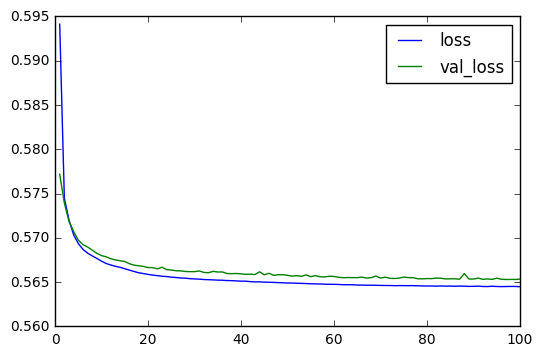

In [23]:
plot_history(hist.history)

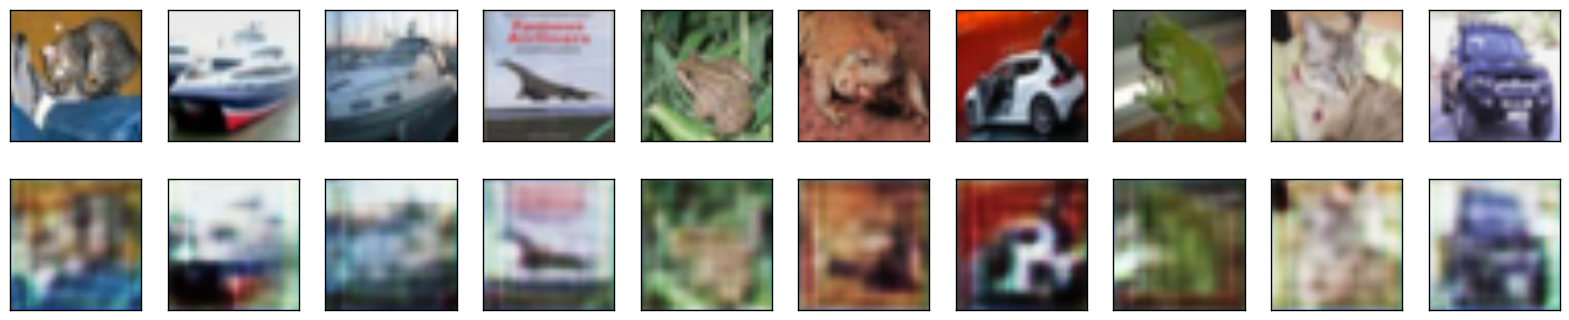

In [24]:
plot_images(x_test2d, autoencoder3, reshape=False)

In [25]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test2d)
print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 0.856025
